<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
## SEM2 2024/5

### CS6462 Assignment 2 - Bayesian Networks, ML with Python

### Instructor: Emil Vassev
March 13th, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Hoang Tu 
### Student Surname: Bui
### Student ID: 24005665
### Date of Final Submission: 27/03/2025
***

# Task #1: Bayesian Networks (50%)

In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “**Notebook Lesson: Building Bayesian Networks with Python**”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, moderate or active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (10%)

### Step 1.1. Describe the problem (2%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

Random Variables: 
1. Intelligence: low, high
1. Module Difficulty: easy, hard
1. Health Status: sick, healthy
1. Grade: A, B, C
1. Forum Activity: not active, moderate, active
1. Letter Quality: weak, strong

Dependencies: 

1. Grade depends on: Intelligence, Module Difficulty, and Health Status
1. Letter Quality depends on Grade and Forum Activity

### Step 1.2. Draw and show the DAG (2%)

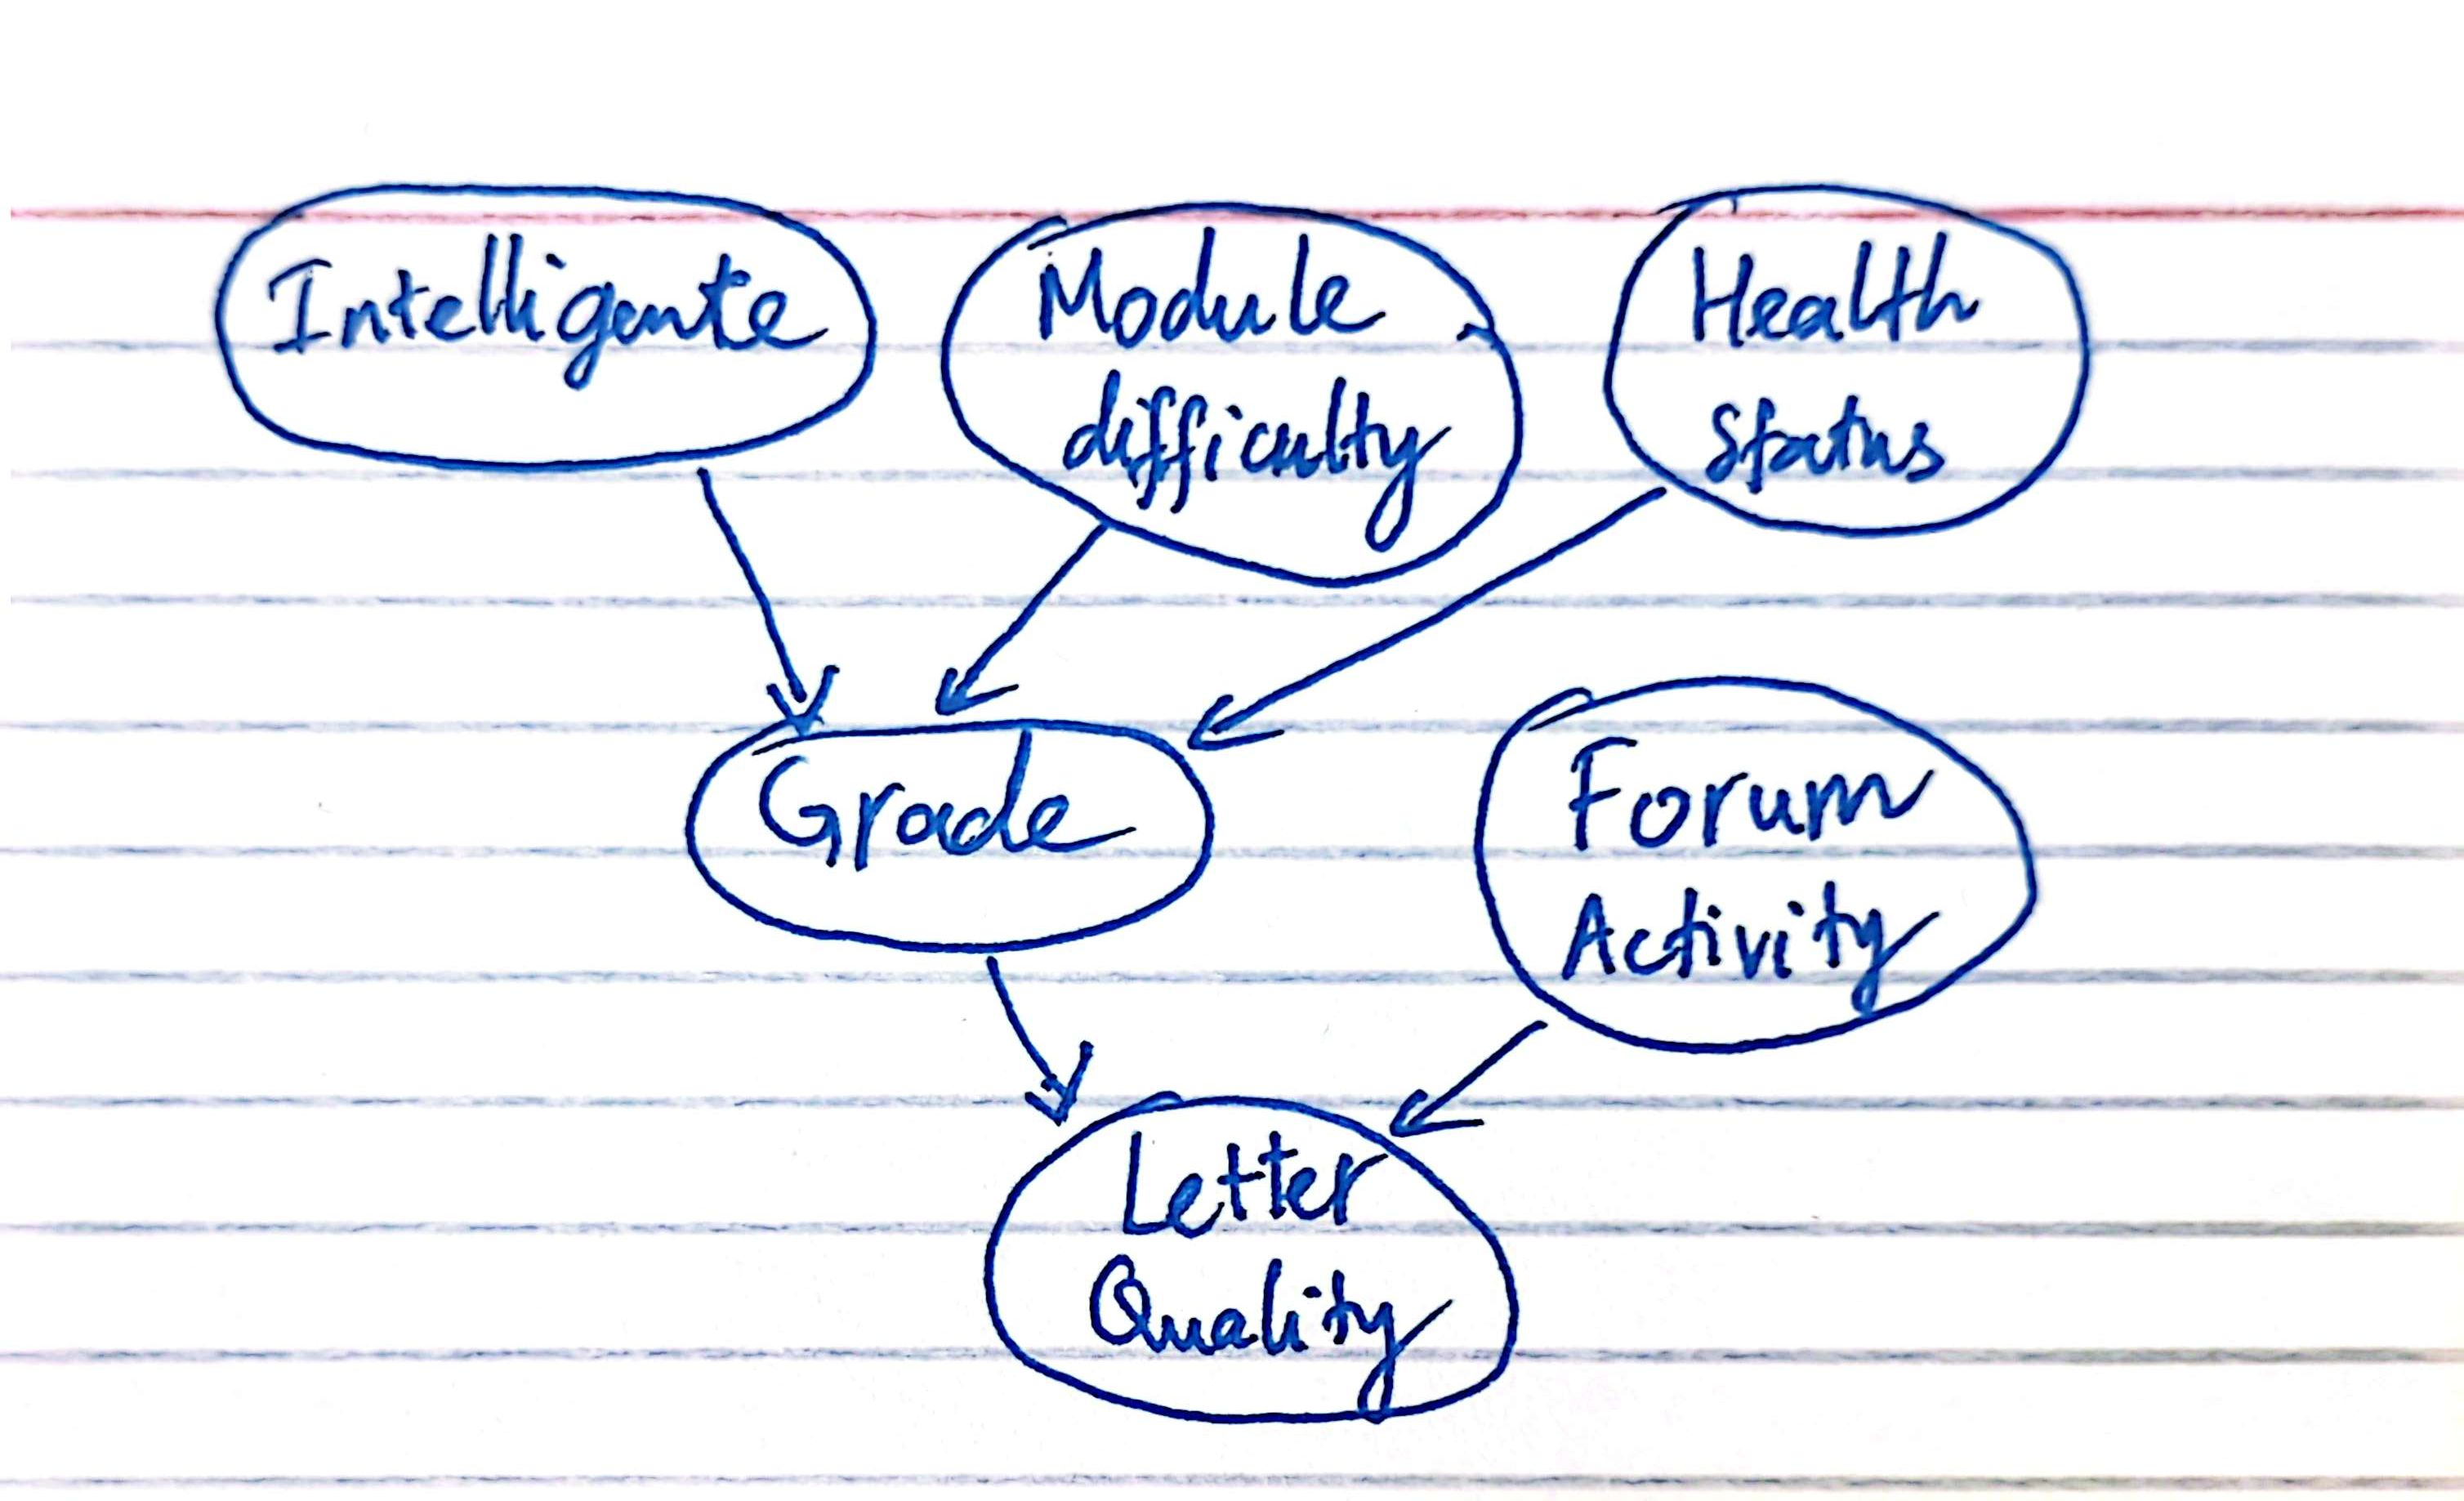

In [109]:
from IPython.display import Image

Image("https://raw.githubusercontent.com/BuiHoangTu/ul.cs6462/master/2_DAG.jpg")

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (5%)

In [110]:
from pgmpy.models import BayesianNetwork


model = BayesianNetwork(
    [
        ("Intelligence", "Grade"),
        ("Difficulty", "Grade"),
        ("Health", "Grade"),
        ("Grade", "Letter"),
        ("Forum", "Letter"),
    ]
)



### Step 1.4. Show the DAG of the Bayesian Network (1%)

<Axes: >

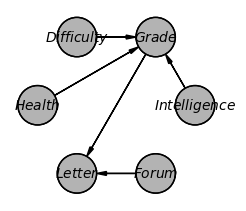

In [111]:
model.to_daft().render()

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (25%)

### Step 2.1: Build the probability distribution tables with TabularCPD (22%)

In [112]:
from pgmpy.factors.discrete import TabularCPD


cpd_i = TabularCPD(
    variable="Intelligence",
    variable_card=2,
    # Assuming many of students have high intelligence
    values=[[0.4], [0.6]],
    state_names={"Intelligence": ["low", "high"]},
)

# Define CPD for Difficulty
cpd_d = TabularCPD(
    variable="Difficulty",
    variable_card=2,
    # Assuming the test is 50-50 easy and hard
    values=[[0.5], [0.5]],
    state_names={"Difficulty": ["easy", "hard"]},
)

# Define CPD for Health
cpd_h = TabularCPD(
    variable="Health",
    variable_card=2,
    # Assuming small chance of being sick
    values=[[0.1], [0.9]],
    state_names={"Health": ["sick", "healthy"]},
)

# Define CPD for Grade
cpd_g = TabularCPD(
    variable="Grade",
    variable_card=3,
    values=[
        # P(Grade=A | I,D,H) - Higher if (high, easy, healthy)
        [0.1, 0.3, 0.2, 0.6, 0.2, 0.4, 0.3, 0.8],
        # P(Grade=B | I,D,H) - Moderate in most cases
        [0.3, 0.4, 0.5, 0.3, 0.4, 0.4, 0.5, 0.15],
        # P(Grade=C | I,D,H) - Higher if (low, hard, sick)
        [0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.05],
    ],
    evidence=["Intelligence", "Difficulty", "Health"],
    evidence_card=[2, 2, 2],
    state_names={
        "Grade": ["A", "B", "C"],
        "Intelligence": ["low", "high"],
        "Difficulty": ["easy", "hard"],
        "Health": ["sick", "healthy"],
    },
)

# Define CPD for Forum
cpd_f = TabularCPD(
    variable="Forum",
    variable_card=3,
    values=[[0.3], [0.5], [0.2]],
    state_names={"Forum": ["not active", "moderate", "active"]},
)

# Define CPD for Letter
cpd_l = TabularCPD(
    variable="Letter",
    variable_card=2,
    values=[
        # P(Letter=weak | Grade, Forum) for all 9 combinations:
        # Order: (G=A,F=not_active), (G=A,F=moderate), (G=A,F=active),
        #        (G=B,F=not_active), ..., (G=C,F=active)
        [0.8, 0.6, 0.3, 0.7, 0.5, 0.2, 0.9, 0.7, 0.5],  # Weak letter probabilities
        [0.2, 0.4, 0.7, 0.3, 0.5, 0.8, 0.1, 0.3, 0.5],  # Strong letter probabilities
    ],
    evidence=["Grade", "Forum"],
    evidence_card=[3, 3],
    state_names={
        "Letter": ["weak", "strong"],
        "Grade": ["A", "B", "C"],
        "Forum": ["not active", "moderate", "active"],
    },
)

### Step 2.2: Associate the distribution models with the network structure (2%)

In [113]:
model.add_cpds(cpd_i, cpd_d, cpd_h, cpd_g, cpd_f, cpd_l)

### Step 2.3: Check the model (1%)

In [114]:
model.check_model()

True

## Step 3: Inference with the Bayesian Network (15%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (5%)

In [115]:
from pgmpy.inference import VariableElimination


infer = VariableElimination(model)


In [116]:
posterior_g = infer.query(variables=["Grade"], evidence={"Intelligence": "high"})
print(posterior_g)

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(A) |       0.5650 |
+----------+--------------+
| Grade(B) |       0.2925 |
+----------+--------------+
| Grade(C) |       0.1425 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter (no evidence) (5%)

In [117]:
posterior_l = infer.query(variables=["Letter"], evidence={})

In [118]:
print(posterior_l)

+----------------+---------------+
| Letter         |   phi(Letter) |
+================+===============+
| Letter(weak)   |        0.5893 |
+----------------+---------------+
| Letter(strong) |        0.4107 |
+----------------+---------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (5%)

In [119]:
posterior_l_fw = infer.query(variables=["Letter"], evidence={"Forum": "not active"})

In [120]:
print(posterior_l_fw)

+----------------+---------------+
| Letter         |   phi(Letter) |
+================+===============+
| Letter(weak)   |        0.7858 |
+----------------+---------------+
| Letter(strong) |        0.2142 |
+----------------+---------------+


# Task #2: Machine Learning with Python (50%)

In this task, you are asked to follow the ML process to:

* preprocess a provided dataset, so it will become suitable for ML operations;
* select an appropriate ML model, so it will cope with the specifics of data and ML tasks;
* train the selected ML model on the preprocessed dataset;
* test the selected ML model on the preprocessed dataset. 

Please, consult the "**Notebook Lesson: Machine Learning with Python**" for the specifics of the different ML models, the Data Preprocessing staeps and the specifics of Model Training and Testing.

## The Dataset
The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed. 

The provided dataset can be loaded as following:

In [121]:
import pandas as pd

url_dataset = "https://raw.githubusercontent.com/evassev/ET5003_SEM1_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


## Target: In this task you are asked to predict the  <span style="color:red">Bond Price</span>.

## Note: In the following steps use the dataframe object <span style="color:red">df</span>.  

## Here are the steps you need to follow:

## Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model.  (5%)

In [122]:
df["Price"].describe()

count    18692.000000
mean       107.535666
std         14.445474
min          0.000000
25%         99.749750
50%        103.324500
75%        110.360500
max        174.278000
Name: Price, dtype: float64

For the problem, we're trying to predict the Bond Price. Because the label exists, this is a supervised problem. Analysing the label, we can see it is a continuous numerical value as described by the code above. Thus, this is a regression problem. Therefore, we should use a **Supervised Regression** ML model.

## Step 2: Data Preprocessing.  (35%)

### Step 2.1: Specifics of the dataset.  (5%)
<span style="color:red">
    TODO: Show the specifics of the dataset in terms of:
    <ul> 
    <li>shape</li>
    <li>columns (features)</li>
    <li>data types</li>
    <li>statistics for the 'Price' feature</li> 
    <li>plot the 'Price' feature</li>
    </ul>    
</span>

Shape of the dataset: (20000, 27)
Columns: Index(['NoRelatedSym', 'Symbol', 'SymbolSfx', 'SecurityID', 'SecurityIDSource',
       'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'OrderQty',
       'SettlDate', 'Currency', 'OrdType', 'TransactTime', 'Price',
       'PriceType', 'Yield', 'NoPartIDs', 'PartyID', 'DealerID',
       'DealerTraderID', 'CustomerTraderID', 'CustomerID', 'PartyIDSource',
       'PartyRole', 'DealerCount', 'OrdSubType'],
      dtype='object')
Data Types: 
NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID

Text(0.5, 0, 'Price')

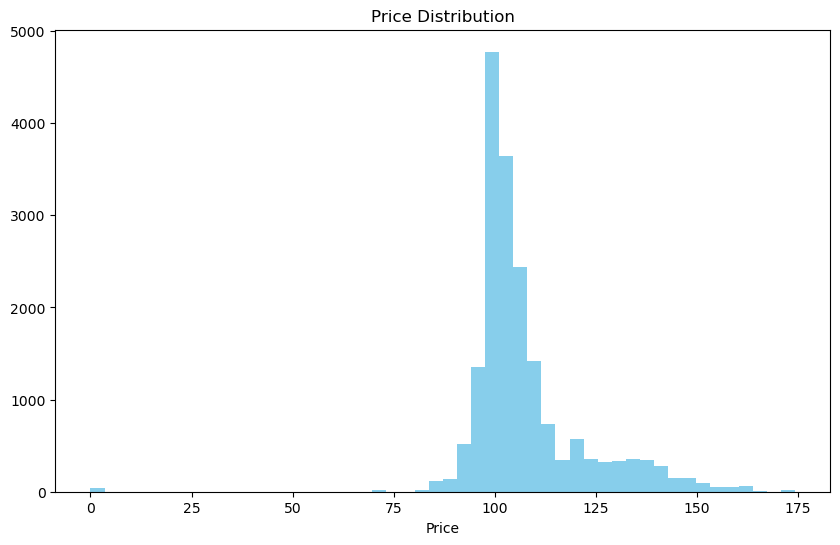

In [123]:
import matplotlib.pyplot as plt


print(f"Shape of the dataset: {df.shape}")
print("="*50)
print(f"Columns: {df.columns}")
print("=" * 50)
print(f"Data Types: \n{df.dtypes}")
print("=" * 50)
print(f"Statistics for Price: {df['Price'].describe()}")
print("=" * 50)

# plot price
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=50, color="skyblue")
plt.title("Price Distribution")
plt.xlabel("Price")

### Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset. (5%)
<span style="color:red">
    TODO:
    <ul> 
    <li>Show the features with unique values for each row in the dataset.</li>
    <li>Remove the features with unique values for each row in the dataset.</li>
    </ul>    
</span>

In [124]:
# find cols with only unique values
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]
print(f"Columns with unique values: {unique_cols}")

# remove columns with unique values
df = df.drop(columns=unique_cols)

Columns with unique values: []


### Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset. (5%)
<span style="color:red">
    TODO:
    <ul> 
    <li>Show the features with one unique value for the entire dataset.</li>
    <li>Remove the features with one unique value for the entire dataset.</li>
    </ul>    
</span>

In [125]:
# find cols with only one value
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Columns with single value: {single_value_cols}")

# remove columns with single value
df = df.drop(columns=single_value_cols)

Columns with single value: ['NoRelatedSym', 'SymbolSfx', 'SecurityIDSource', 'Currency', 'OrdType', 'PriceType', 'NoPartIDs', 'PartyID', 'PartyIDSource', 'PartyRole', 'OrdSubType']


### Step 2.4: Data Cleaning: Remove records with null (NAN) values. (5%)
<span style="color:red">
    TODO:
    <ul> 
    <li>Show the number of null values per feature.</li>
    <li>For any feature, remove the rows containg a null value.</li>
    </ul>    
</span>

In [126]:
# count number of null values per column
null_values = df.isnull().sum()
print(f"Null values per feature: \n{null_values}")

# remove all rows with null values
df = df.dropna()

Null values per feature: 
Symbol                  0
SecurityID          13959
SecurityType            0
MaturityDate            0
IssueDate               0
Side                    0
OrderQty                0
SettlDate               0
TransactTime            0
Price                1308
Yield                1297
DealerID                0
DealerTraderID       1055
CustomerTraderID        0
CustomerID              0
DealerCount             0
dtype: int64


### Step 2.5: Data Transformation: Convert all non-numeric features to numeric. (15%)
<span style="color:red">
    TODO:
    <ul> 
    <li>Show all non-numeric features.</li>
    <li>Convert the non-numeric features to numeric.</li>
    </ul>    
</span>

In [130]:
# show non-numerical columns
non_numerical_cols = df.select_dtypes(exclude=["number"]).columns
print(f"Non-numerical columns: \n{non_numerical_cols}")

Non-numerical columns: 
Index(['Symbol', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side',
       'SettlDate', 'TransactTime'],
      dtype='object')


In [128]:
# summary of non-numerical columns
df[non_numerical_cols].describe()

,Symbol,SecurityType,MaturityDate,IssueDate,Side,SettlDate,TransactTime
count,5685,5685,5685,5685,5685,5685,5685
unique,304,3,245,301,2,46,1638
top,135087ZS6,GOC,12/1/2045,6/13/2011 0:00,SELL,6/20/2018,20:08:41
freq,250,3330,273,250,2910,908,27


#### Transforming method

1. For features that contains order relationship (MaturityDate IssueDate SettlDate TransactTime), we choose ordinal methods
1. For the rest, we use one-hot encoding. Since all missing data has been dropped, we can use drop-first encoding to reduce amount of features created.


In [132]:
datetimeFeats = ["MaturityDate", "IssueDate", "SettlDate", "TransactTime"]
symbolFeat = "Symbol"

for col in datetimeFeats:
    df[col] = pd.to_datetime(df[col]).astype(int) // 10**9
    
df[symbolFeat], uniques = pd.factorize(df[symbolFeat])

# one-hot encode with drop_first=True
df = pd.get_dummies(
    df, columns=non_numerical_cols.difference(datetimeFeats).difference([symbolFeat]), drop_first=True  # type: ignore
)

/tmp/ipykernel_737339/3606804887.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col]).astype(int) // 10**9


## Step 3: Model Training and Testing.  (10%)

In [133]:
df.shape

(5685, 17)

In [134]:
df.head(10)

,Symbol,SecurityID,MaturityDate,IssueDate,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount,SecurityType_GOC,SecurityType_PROV,Side_SELL
6204,0,1657312.0,2490393600,1401667200,1000000,1529452800,1743086390,111.140,2.243,334,113683.0,11570,454,4,True,False,False
6205,0,1657312.0,2490393600,1401667200,1000000,1529452800,1743086390,111.220,2.240,335,114347.0,11570,454,4,True,False,False
6206,1,1657313.0,1588291200,1518134400,5000000,1529452800,1743086412,99.760,1.881,323,118599.0,6753,204,1,True,False,True
6207,0,1657317.0,2490393600,1401667200,1250000,1529452800,1743086465,111.198,2.241,321,7177.0,6687,178,4,True,False,False
6208,0,1657317.0,2490393600,1401667200,1250000,1529452800,1743086465,111.130,2.244,327,7687.0,6687,178,4,True,False,False
6209,0,1657317.0,2490393600,1401667200,1250000,1529452800,1743086465,111.190,2.241,334,113683.0,6687,178,4,True,False,False
6210,0,1657317.0,2490393600,1401667200,1250000,1529452800,1743086465,111.300,2.236,337,5168.0,6687,178,4,True,False,False
6211,0,1657324.0,2490393600,1401667200,1250000,1529452800,1743086647,111.180,2.241,321,7177.0,6687,178,4,True,False,False
6212,0,1657324.0,2490393600,1401667200,1250000,1529452800,1743086647,111.130,2.244,327,7687.0,6687,178,4,True,False,False
6213,0,1657324.0,2490393600,1401667200,1250000,1529452800,1743086647,111.150,2.243,334,113683.0,6687,178,4,True,False,False


### Step 3.1: Select and Import a ML Algorithm. (2%)
<span style="color:red">
    TODO: Based on your rationale provided in Step 1, import one of the following algorithms:
    <ul> 
    <li>for Supervised Classification ML use <b>'from sklearn.ensemble import RandomForestClassifier'</b></li>
    <li>for Supervised Regression ML use <b>'from sklearn.ensemble import RandomForestRegressor'</b></li>
    <li>for Unsupervised ML use <b>'from sklearn.cluster import KMeans'</b></li>
    </ul>    
</span>

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Step 3.2: Train the ML Model. (5%)
<span style="color:red">
    TODO:
    <ul> 
    <li>from the preprocessed dataset, extract 𝑋 - a dataset of all the features but 'Price'</li> 
    <li>from the preprocessed dataset, extract 𝑌  - vector that contains all the values of 'Price'</li>
    <li>slice the dataset: 80% for training and 20% for testing</li>
    <li>create an instance of the selected ML algorithm and train</li>
    </ul>    
</span>

In [136]:
X, y = df.drop(columns=["Price"]), df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Step 3.3: Test the ML Model. (3%)
<span style="color:red">
    TODO:
    <ul> 
    <li>use the testing part of the dataset to predic the Bond Prices</li> 
    <li>compute and show the prediction score</li>
    </ul>    
</span>

In [137]:
y_pred = model.predict(X_test)
print(f"Predicted Price: {y_pred}")

print(f"Prediction Score: {model.score(X_test, y_test)}")

Predicted Price: [101.73662  98.22373  98.59043 ... 104.95265 115.48267 111.45137]
Prediction Score: 0.9970621874632407
